In [88]:
# run if ModuleNotFoundError occurs, then use the path output to install modules
import sys
print(sys.executable) 

/usr/local/Cellar/ipython/8.0.1/libexec/bin/python3.10


### Functions for Data Loading and Plotting

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import math, random
import scipy.optimize
import scipy.stats as stats
import seaborn as sns
import re

sns.set(font_scale=1.2, style="whitegrid")
plt.rcParams['figure.figsize'] = [4.0, 4.0]

def load_benchmark(filename, norm=0, n_filter=None):
    data = []
    with open(filename, "r") as f:
        for line in f:
            words = line.split(" ")
            if len(words) < 5:
                continue
            algo = words[0]
            if algo == "ProposalArray":
                algo = "Proposal Array"
            elif algo == "ProposalArrayStar":
                algo = "Proposal Array$*$"
            dist = words[1]
            if dist == "NoisyUniform":
                dist = "Noisy Uniform"
            elif dist == "PowerLaw":
                dist = "Skewed"
            elif dist == "NoisyDelta":
                dist = "Noisy Delta"
            n = int(words[3].replace("]", ""))
            if n_filter and n not in n_filter:
                continue
            s = float(words[6].replace("ms\n", "")) / 1000
            if norm > 0:
                s /= norm
            data.append([algo, dist, n, s])
    data = pd.DataFrame(data, columns=["Algo", "Dist", "n", "s"])
    return data

### Sequential

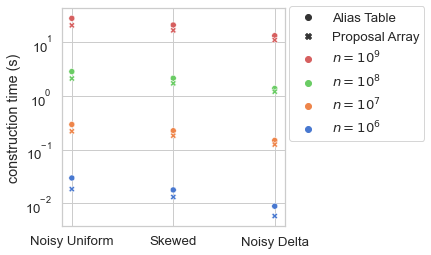

In [90]:
data = load_benchmark("benchmark_construction")

fig, ax = plt.subplots()
g_results=sns.scatterplot(x="Dist", y="s", data=data, hue="n", style="Algo", palette="muted")
g_results.set(xlabel='', ylabel='construction time (s)')
g_results.set(yscale='log')
handles, labels = ax.get_legend_handles_labels()
handles = [handles[6], handles[7], handles[4], handles[3], handles[2], handles[1]]
labels = ["Alias Table", "Proposal Array", "$n = 10^9$", "$n = 10^8$", "$n = 10^7$", "$n = 10^6$"]
ax.legend(handles=handles[0:], labels=labels[0:], bbox_to_anchor=(1.02, 1.01), loc=2, borderaxespad=0., ncol=1)
g_results.get_figure().savefig("construction.pdf", format='pdf', dpi=1200, bbox_inches="tight")

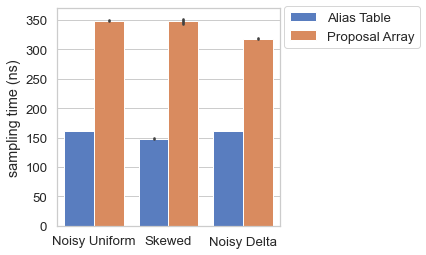

In [91]:
data = load_benchmark("benchmark_sampling", 1 / 1000)

fig, ax = plt.subplots()
g_results=sns.barplot(x="Dist", y="s", data=data, hue="Algo", palette="muted")
g_results.set(xlabel='', ylabel='sampling time (ns)')
handles, labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[1]]
labels = ["Alias Table", "Proposal Array"]
ax.legend(handles=handles[0:], labels=labels[0:], bbox_to_anchor=(1.02, 1.01), loc=2, borderaxespad=0., ncol=1)
g_results.get_figure().savefig("sampling.pdf", format='pdf', dpi=1200, bbox_inches="tight")

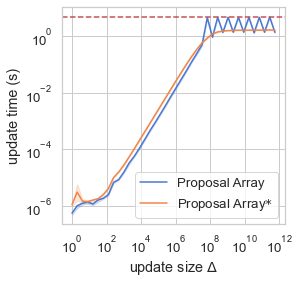

In [92]:
data = load_benchmark("benchmark_increasing")

fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data, hue="Algo", palette="muted")
g_results.set(xlabel='update size $\Delta$', ylabel='update time (s)')
g_results.set(xscale='log', yscale='log', xticks=[1, 100, 10000, 1000000, 100000000, 10000000000, 1000000000000], yticks=[1, 0.01, 0.0001, 0.000001])
handles, labels = ax.get_legend_handles_labels()
ax.axhline(4.6, color="r", ls='--')
ax.legend(handles=handles[0:], labels=labels[0:], loc=4)
g_results.get_figure().savefig("increasing.pdf", format='pdf', dpi=1200, bbox_inches="tight")

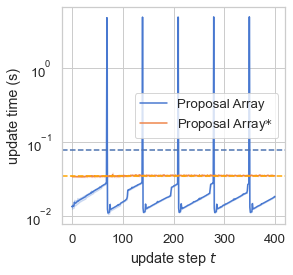

In [93]:
data = load_benchmark("benchmark_constant")

fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data, hue="Algo", palette="muted")
g_results.set(xlabel='update step $t$', ylabel='update time (s)')
g_results.set(xscale='linear', yscale='log')
handles, labels = ax.get_legend_handles_labels()
ax.axhline(data[data["Algo"] == "Proposal Array"].s.mean(), color="b", ls='--')
ax.axhline(data[data["Algo"] == "Proposal Array$*$"].s.mean(), color="orange", ls='--')
ax.legend(handles=handles[0:], labels=labels[0:])
g_results.get_figure().savefig("constant.pdf", format='pdf', dpi=1200, bbox_inches="tight")

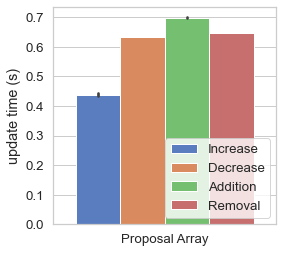

In [94]:
data = load_benchmark("benchmark_types")

fig, ax = plt.subplots()
g_results=sns.barplot(x="Algo", y="s", data=data, hue="n", palette="muted")
g_results.set(xlabel='', ylabel='update time (s)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=['Increase', 'Decrease', 'Addition', 'Removal'], loc=4)
g_results.get_figure().savefig("types.pdf", format='pdf', dpi=1200, bbox_inches="tight")

In [57]:
data = load_benchmark("benchmark_dynamic_sampling", 1 / 1000)

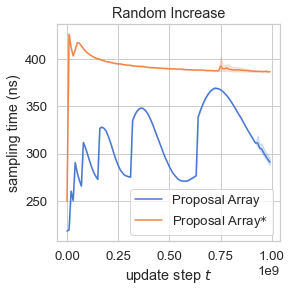

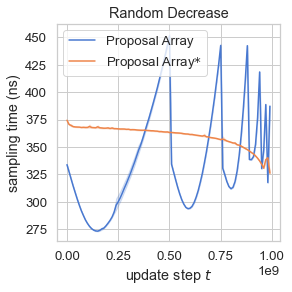

In [58]:
fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data[data["Dist"] == "RandomIncrease"], hue="Algo", palette="muted")
g_results.set(xlabel='update step $t$', ylabel='sampling time (ns)')
g_results.set(xscale='linear', yscale='linear', title='Random Increase')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
g_results.get_figure().savefig("random_increase.pdf", format='pdf', dpi=1200, bbox_inches="tight")

fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data[data["Dist"] == "RandomDecrease"], hue="Algo", palette="muted")
g_results.set(xlabel='update step $t$', ylabel='sampling time (ns)')
g_results.set(xscale='linear', yscale='linear', title='Random Decrease')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
g_results.get_figure().savefig("random_decrease.pdf", format='pdf', dpi=1200, bbox_inches="tight")

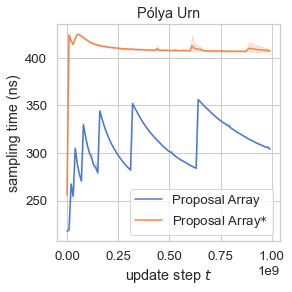

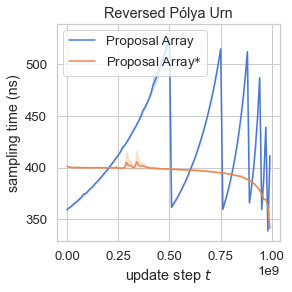

In [59]:
fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data[data["Dist"] == "PolyaUrn"], hue="Algo", palette="muted")
g_results.set(xlabel='update step $t$', ylabel='sampling time (ns)')
g_results.set(xscale='linear', yscale='linear', title='Pólya Urn')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
g_results.get_figure().savefig("polya_urn.pdf", format='pdf', dpi=1200, bbox_inches="tight")

fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data[data["Dist"] == "PolyaUrnReverse"], hue="Algo", palette="muted")
g_results.set(xlabel='update step $t$', ylabel='sampling time (ns)')
g_results.set(xscale='linear', yscale='linear', title='Reversed Pólya Urn')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
g_results.get_figure().savefig("reversed_polya_urn.pdf", format='pdf', dpi=1200, bbox_inches="tight")

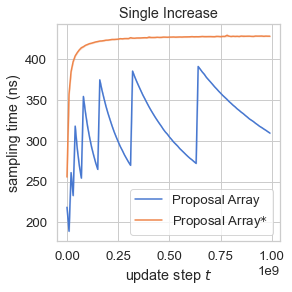

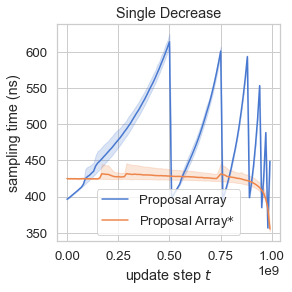

In [56]:
fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data[data["Dist"] == "SingleIncrease"], hue="Algo", palette="muted")
g_results.set(xlabel='update step $t$', ylabel='sampling time (ns)')
g_results.set(xscale='linear', yscale='linear', title='Single Increase')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
g_results.get_figure().savefig("single_increase.pdf", format='pdf', dpi=1200, bbox_inches="tight")

fig, ax = plt.subplots()
g_results=sns.lineplot(x="n", y="s", data=data[data["Dist"] == "SingleDecrease"], hue="Algo", palette="muted")
g_results.set(xlabel='update step $t$', ylabel='sampling time (ns)')
g_results.set(xscale='linear', yscale='linear', title='Single Decrease')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
g_results.get_figure().savefig("single_decrease.pdf", format='pdf', dpi=1200, bbox_inches="tight")